In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [2]:
# Go to website and copy content
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
# Read in HTML tables into a DataFrame
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
# Select the first table
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
# Examine the data types of all the DataFrame columns
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [6]:
# Change data type for date
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [7]:
# How many months exist on Mars?
mars_months = mars_df['month'].nunique()
print(mars_months, f'months exist on Mars!')

12 months exist on Mars!


In [8]:
# How many Martian days worth of data exist in the scraped dataset?
martian_days = mars_df['sol'].nunique()
print(f'The scraped dataset contains', martian_days, 'Martian days worth of data!')

The scraped dataset contains 1867 Martian days worth of data!


In [9]:
# Find the average minimum temperature for each month
min_temp_list=[]

for i in range(1,mars_months+1):
    monthly_weather = {"Month":"","Avg Min Temp":""}
    min_month_avg = mars_df.loc[mars_df['month']==i]['min_temp'].mean()
    round_min_month_avg = round(min_month_avg,0)
    monthly_weather["Month"] = i
    monthly_weather["Avg Min Temp"] = round_min_month_avg
    min_temp_list.append(monthly_weather)    

print(min_temp_list)

[{'Month': 1, 'Avg Min Temp': -77.0}, {'Month': 2, 'Avg Min Temp': -80.0}, {'Month': 3, 'Avg Min Temp': -83.0}, {'Month': 4, 'Avg Min Temp': -83.0}, {'Month': 5, 'Avg Min Temp': -79.0}, {'Month': 6, 'Avg Min Temp': -75.0}, {'Month': 7, 'Avg Min Temp': -72.0}, {'Month': 8, 'Avg Min Temp': -68.0}, {'Month': 9, 'Avg Min Temp': -69.0}, {'Month': 10, 'Avg Min Temp': -72.0}, {'Month': 11, 'Avg Min Temp': -72.0}, {'Month': 12, 'Avg Min Temp': -74.0}]


In [10]:
# Convert list to JSON
import json
json_min_temp_list = json.dumps(min_temp_list)

# Create DataFrame
min_temp_df=pd.read_json(json_min_temp_list)
min_temp_df

,Month,Avg Min Temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Average Minimum Temperature on Mars')

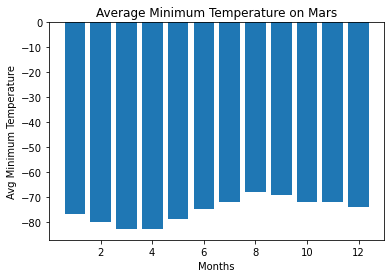

In [11]:
# Create bar chart for average minimum temperature
plt.bar(min_temp_df['Month'], min_temp_df['Avg Min Temp'])
plt.xlabel("Months")
plt.ylabel("Avg Minimum Temperature")
plt.title("Average Minimum Temperature on Mars")

In [13]:
# Find the average pressure for each month
min_pressure_list=[]

for x in range(1,mars_months+1):
    monthly_pressure = {"Month":"","Avg Pressure":""}
    pressure_month_avg = mars_df.loc[mars_df['month']==x]['pressure'].mean()
    round_pressure_month_avg = round(pressure_month_avg,0)
    monthly_pressure["Month"] = x
    monthly_pressure["Avg Pressure"] = round_pressure_month_avg
    min_pressure_list.append(monthly_pressure)    

print(min_pressure_list)

[{'Month': 1, 'Avg Pressure': 862.0}, {'Month': 2, 'Avg Pressure': 889.0}, {'Month': 3, 'Avg Pressure': 877.0}, {'Month': 4, 'Avg Pressure': 806.0}, {'Month': 5, 'Avg Pressure': 749.0}, {'Month': 6, 'Avg Pressure': 745.0}, {'Month': 7, 'Avg Pressure': 795.0}, {'Month': 8, 'Avg Pressure': 874.0}, {'Month': 9, 'Avg Pressure': 913.0}, {'Month': 10, 'Avg Pressure': 887.0}, {'Month': 11, 'Avg Pressure': 857.0}, {'Month': 12, 'Avg Pressure': 842.0}]


In [14]:
# Convert list to JSON
json_min_pressure_list = json.dumps(min_pressure_list)

# Create DataFrame
pressure_df = pd.read_json(json_min_pressure_list)
pressure_df

,Month,Avg Pressure
0,1,862
1,2,889
2,3,877
3,4,806
4,5,749
5,6,745
6,7,795
7,8,874
8,9,913
9,10,887


Text(0.5, 1.0, 'Average Pressure on Mars')

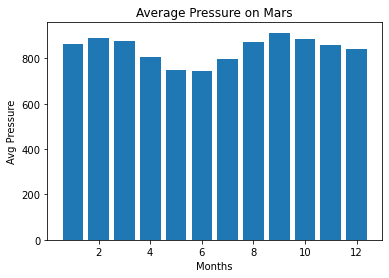

In [15]:
# Create bar chart for average pressure
plt.bar(pressure_df['Month'], pressure_df['Avg Pressure'])
plt.xlabel("Months")
plt.ylabel("Avg Pressure")
plt.title("Average Pressure on Mars")

Text(0.5, 1.0, 'Daily Minimum Temperatures on Mars')

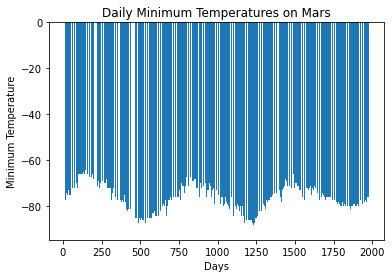

In [18]:
# Ploting the daily minimum temperature
plt.bar(mars_df['sol'], mars_df['min_temp'])
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")
plt.title('Daily Minimum Temperatures on Mars')

In [19]:
# Export the DataFrame to a CSV file
mars_df.to_csv('mars_df.csv',index=False)

In [20]:
browser.quit()